In [1]:
import pandas as pd
from mplsoccer import Pitch
from mplsoccer import VerticalPitch
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np

In [2]:
data = pd.read_csv("Data/Shots/davisOrigins.csv").reset_index()
data.dropna(inplace=True)

In [3]:
data.dropna(inplace=True)
startX = []
startY = []
endX = []
endY = []
for i in range(data.shape[0]):
    row = data.iloc[i]
    startX.append(float(row.get("Start Pos").split(", ")[0][1:]))
    startY.append(float(row.get("Start Pos").split(", ")[1][:-1]))
    endX.append(float(row.get("End Pos").split(", ")[0][1:]))
    endY.append(float(row.get("End Pos").split(", ")[1][:-1]))
data = data.assign(startX = startX)
data =data.assign(startY = startY)
data =data.assign(endX = endX)
data =data.assign(endY = endY)
oppSide = dict()
for i in data.get("numOpportunity").unique():
    df = data[data.get("numOpportunity")==i]
    endX = df.iloc[-1].get("endX")
    if endX >60:
        side = "right"
    elif endX<=60:
        side = "left"
    oppSide[i]=side
data = data.assign(Side = data.get("numOpportunity").apply(lambda num:oppSide[num]))
rightOpportunities = data[data.get("Side") == "right"]
rightOpportunities = rightOpportunities.assign(startX = 120-rightOpportunities.get("startX"))
rightOpportunities = rightOpportunities.assign(startY = 80-rightOpportunities.get("startY"))
rightOpportunities = rightOpportunities.assign(endX = 120-rightOpportunities.get("endX"))
rightOpportunities = rightOpportunities.assign(endY = 80-rightOpportunities.get("endY"))
leftOpportunities = data[data.get("Side") == "left"]
opportunities = pd.merge(rightOpportunities, leftOpportunities,how = "outer")
opportunities.to_csv("Shots/davisOrigins.csv",index = False)

Text(0.5, 1.0, 'Heat Map of Opportunities Conceded With Buildup')

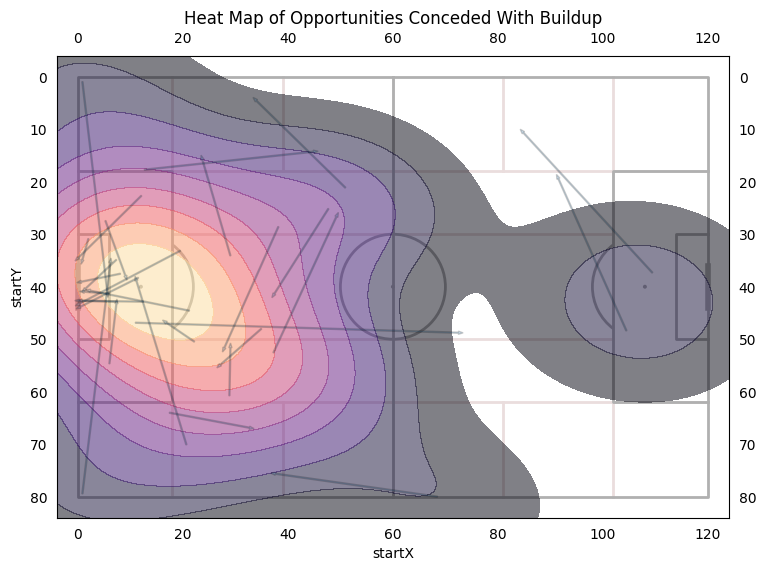

In [4]:
pitch = Pitch(positional=True, axis=True,label=True)
fig, ax = plt.subplots(figsize = (10,6))
pitch.draw(ax=ax)
kde = sns.kdeplot(x=opportunities.get("startX"),y=opportunities.get("startY"),fill = True,shade_lowest = False,alpha = .5,n_levels = 10,cmap = "magma")

for i in range(opportunities.shape[0]):
    row = opportunities.iloc[i]
    if row.get("Event") == "Tackle" and row.get("End Pos") == "[-1, -1]":
        plt.plot(row.get("startX"),row.get("startY"))
        continue
    plt.arrow(row.get("startX"),row.get("startY"),row.get("endX")-row.get("startX"),row.get("endY")-row.get("startY"),width = .2,alpha = .2)
plt.title("Heat Map of Opportunities Conceded With Buildup")

In [5]:
origins =[]
for i in range(int(opportunities.get("numOpportunity").max())+1):
    limited = opportunities[opportunities.get("numOpportunity") == i].iloc[0]
    origins.append(limited)
origins = pd.DataFrame(origins)

In [6]:
origins

,index,Game,numOpportunity,Event,Result,Start Pos,End Pos,Team,Player,startX,startY,endX,endY,Side
0,1,Davis,0.0,Pass,Unsuccessful,"[17.428571428571416, 64.0]","[32.66666666666665, 66.85714285714286]",UCSD,12.0,17.428571,64.000000,32.666667,66.857143,left
3,7,Davis,1.0,Set Piece,Successful,"[0.857142857142847, 0.952380952380949]","[5.619047619047606, 41.142857142857146]",Opponent,-1.0,0.857143,0.952381,5.619048,41.142857,left
5,11,Davis,2.0,Pass,Unsuccessful,"[12.666666666666657, 17.714285714285722]","[44.85714285714284, 14.285714285714292]",UCSD,10.0,12.666667,17.714286,44.857143,14.285714,left
8,17,Davis,3.0,Pass,Unsuccessful,"[10.952380952380942, 46.85714285714286]","[72.47619047619045, 48.76190476190476]",UCSD,2.0,10.952381,46.857143,72.476190,48.761905,left
11,23,Davis,4.0,Pass,Successful,"[37.23809523809522, 52.57142857142857]","[49.23809523809522, 26.66666666666667]",Opponent,-1.0,37.238095,52.571429,49.238095,26.666667,left
14,29,Davis,5.0,Pass,Successful,"[104.47619047619045, 48.38095238095238]","[91.52380952380952, 19.42857142857143]",Opponent,-1.0,104.476190,48.380952,91.523810,19.428571,left
17,35,Davis,6.0,Tackle,Successful,"[38.95238095238094, 56.19047619047619]","[-1, -1]",Opponent,8.0,38.952381,56.190476,-1.000000,-1.000000,left
20,41,Davis,7.0,Pass,Successful,"[10.571428571428562, 42.666666666666664]","[35.14285714285713, 69.33333333333333]",Opponent,-1.0,109.428571,37.333333,84.857143,10.666667,right
23,47,Davis,8.0,Tackle,Successful,"[78.19047619047618, 19.61904761904762]","[-1, -1]",Opponent,2.0,41.809524,60.380952,121.000000,81.000000,right
26,53,Davis,9.0,Set Piece,Successful,"[119.14285714285714, 0.5714285714285694]","[113.8095238095238, 44.57142857142857]",Opponent,-1.0,0.857143,79.428571,6.190476,35.428571,right


Text(0.5, 1.0, 'Opponent Shots Origin')

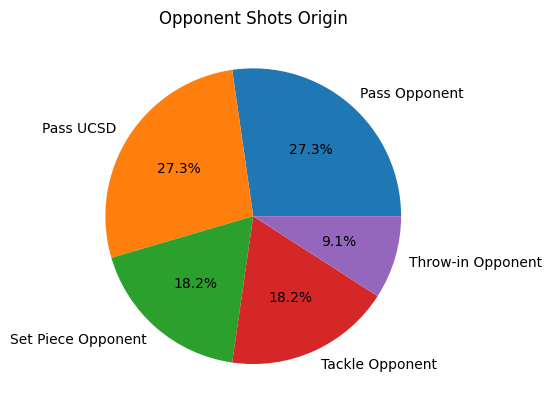

In [7]:
originCounts = origins.groupby(["Event","Team"]).count().reset_index()
labels = originCounts.get("Event") + " "+originCounts.get("Team")
plt.pie(originCounts.get("index"),labels = labels,autopct='%1.1f%%')
plt.title("Opponent Shots Origin")

In [8]:
origins[origins.get("Event")=="Set Piece"].shape[0]

2

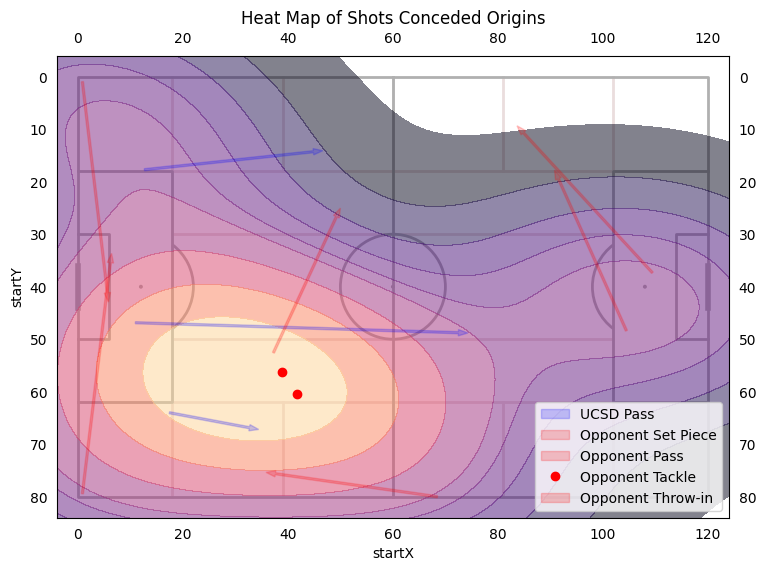

In [9]:
pitch = Pitch(positional=True, axis=True,label=True)
fig, ax = plt.subplots(figsize = (10,6))
pitch.draw(ax=ax)
kde = sns.kdeplot(x=origins.get("startX"),y=origins.get("startY"),fill = True,shade_lowest = False,alpha = .5,n_levels = 10,cmap = "magma")

for i in range(origins.shape[0]):
    row = origins.iloc[i]
    team = row.get("Team")
    if team == "UCSD":
            color = "blue"
    else:
            color = "red"
    if row.get("Event") == "Tackle" or row.get("Event")=="2nd Ball":
        if row.get("Event")=="Tackle":
             shape = 'o'
        else:
             shape = 'v'
        if team == "UCSD":
            color = "b"
        else:
            color = "r"
        plt.plot(row.get("startX"),row.get("startY"),shape+color,label = team+" "+row.get("Event"))
        continue
        continue
    plt.arrow(row.get("startX"),row.get("startY"),row.get("endX")-row.get("startX"),row.get("endY")-row.get("startY"),width = .4,alpha = .2,color =color,label = team+ " "+row.get("Event"))
plt.title("Heat Map of Shots Conceded Origins")
handles, labels = plt.gca().get_legend_handles_labels()
unique_labels = dict(zip(labels, handles))

plt.legend(unique_labels.values(), unique_labels.keys())


11

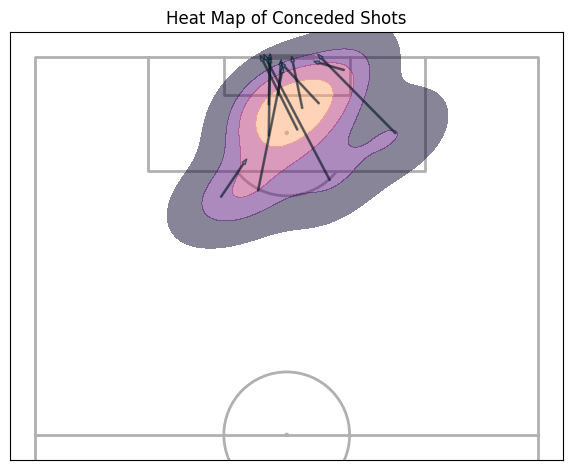

In [10]:
shots = opportunities[opportunities.get("Event").apply(lambda event: "Shot" in event)]
pitch = VerticalPitch(half=True, axis=True)
fig, ax = pitch.draw()
kde = sns.kdeplot(y=120-shots.get("startX"),x=80-shots.get("startY"),fill = True,shade_lowest = False,alpha = .5,n_levels = 5,cmap = "magma")
for i in range(shots.shape[0]):
    row = shots.iloc[i]
    if row.get("Event") == "Tackle" and row.get("End Pos") == "[-1, -1]":
        plt.plot(row.get("startX"),row.get("startY"))
        continue
    plt.arrow(80-row.get("startY"),120-row.get("startX"),-1*(row.get("endY")-row.get("startY")),-1*(row.get("endX")-row.get("startX")),width = .2,alpha = .5)
plt.title("Heat Map of Conceded Shots")
shots.shape[0]

In [11]:
#shot assists
shotAssists = []
for i in range(1, opportunities.shape[0]):
    previous = opportunities.iloc[i-1]
    row = opportunities.iloc[i]
    if "Shot" in row.get("Event"):
        shotAssists.append([previous.get("numOpportunity"),previous.get("Game"),previous.get("Team"),previous.get("Event"),previous.get("Result"),previous.get("startX"),previous.get("startY"),previous.get("endX"),previous.get("endY"),row.get("Result")])
shotAssists = pd.DataFrame(shotAssists,columns=["numOpportunity","Game","Team","Event","Event Result","startX","startY","endX",'endY',"Shot result"])
shotAssists = shotAssists[shotAssists.get("Event")!="Set Piece"]

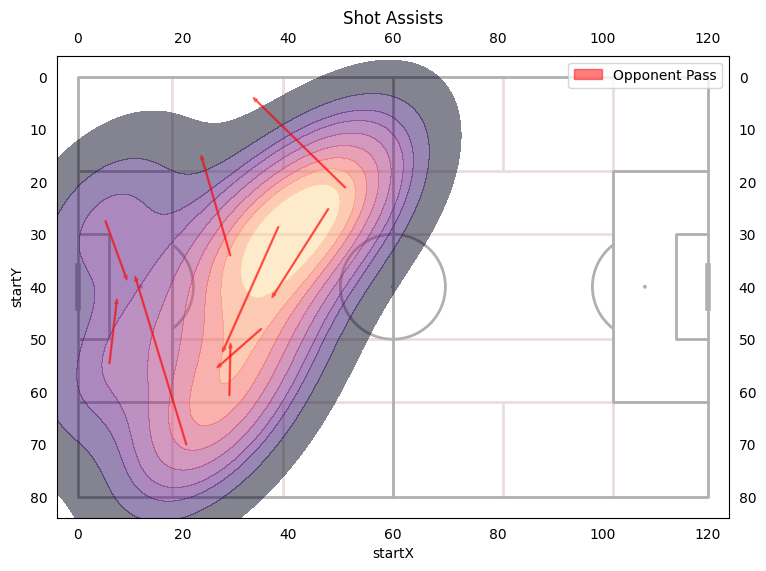

In [12]:
pitch = Pitch(positional=True, axis=True,label=True)
fig, ax = plt.subplots(figsize = (10,6))
pitch.draw(ax=ax)
kde = sns.kdeplot(x=shotAssists.get("startX"),y=shotAssists.get("startY"),fill = True,shade_lowest = False,alpha = .5,n_levels = 10,cmap = "magma")
for i in range(shotAssists.shape[0]):
    row = shotAssists.iloc[i]
    team = row.get("Team")
    if team == "UCSD":
            color = "blue"
    else:
            color = "red"
    if row.get("Event") == "Tackle" or row.get("Event")=="1st Ball":
        if row.get("Event")=="Tackle":
             shape = 'o'
        else:
             shape = 'v'
        if team == "UCSD":
            color = "b"
        else:
            color = "r"
        plt.plot(row.get("startX"),row.get("startY"),shape+color,label = team+" "+row.get("Event"))
        continue
    plt.arrow(row.get("startX"),row.get("startY"),row.get("endX")-row.get("startX"),row.get("endY")-row.get("startY"),width = .2,alpha = .5,color = color, label = team+" "+row.get("Event"))
handles, labels = plt.gca().get_legend_handles_labels()
unique_labels = dict(zip(labels, handles))

plt.legend(unique_labels.values(), unique_labels.keys())
plt.title("Shot Assists")
plt.show()

ValueError: 'label' must be of length 'x'

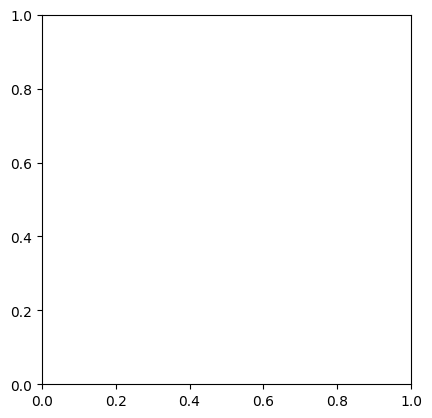

In [13]:
counts = shotAssists.groupby(["Event","Team"]).count()
plt.pie(counts.get("Game"),labels=["Lipscomb Pass","UCSD Tackle","Lipscomb Tackle"],autopct='%1.1f%%')
plt.title("Shot Assists")